In [14]:
import torch

random_seed = 28

device = torch.device("mps" if torch.mps.is_available() else "cpu")
print("Device", device)

Device mps


## Поиск и загрузка датасета

Начал с поиска датасетов для классификации. Нашел: 

- https://chopnlearn.github.io/
- https://www.kaggle.com/datasets/kmader/food41?ref=labellerr.com

Однако позже понял, что классификация не совсем подходит под нашу задачу: у нас может быть несколько классов на одном фото. А классификация так не умеет.

---

Решил использовать датасеты для детекции. Нашел: 

https://universe.roboflow.com/fooddetection-htdbb/food-detection-dataset

Немного дополнил его своими данными (несколько фото).

In [ ]:
['Apple', 'Apple pie', 'Bagel', 'Banana', 
 'Bell pepper', 'Bread', 'Broccoli', 'Cake', 
 'Candy', 'Carrot', 'Cereal bar', 'Cereal bar packaged', 
 'Cheese', 'Chicken nugget', 'Chicken roast', 'Chips', 
 'Chips packaged', 'Chocolate bar', 'Chocolate bar packaged', 
 'Coconut', 'Coke', 'Cookie', 'Cracker', 'Cracker packaged', 
 'Croissant', 'Cucumber', 'Deep fried chicken wing', 'Donuts', 
 'Fanta', 'French fries', 'Frutta secca', 'Gallette di riso', 
 'Gallette di riso packaged', 'Grissini', 'Hamburger', 'Hot dog', 
 'Ice cream', 'Juice', 'Lasagna', 'Lemon', 'Macaron', 'Mango', 
 'Merendine', 'Merendine packaged', 'Milk', 'Muffin', 'Mushroom', 
 'Oil pasta', 'Orange', 'Pancake', 'Pasta al ragu', 
 'Pasta with carbonara sauce', 'Peach', 'Pear', 'Pineapple', 
 'Pizza', 'Popcorn', 'Potato', 'Pumpkin', 'Rare cheese cake', 
 'Risotto', 'Ritz cracker', 'Ritz cracker packaged', 'Salad', 
 'Salatini', 'Salatini packaged', 'Sandwich', 'Spread', 'Steak', 
 'Strawberry', 'Taralli', 'Tiramisu', 'Tomato', 
 'Tortellini in broth', 'Waffle', 'Watermelon', 'Zucchini']

# Первая модель - YOLO11

### Обучение

In [1]:
import gc
import torch
from ultralytics import settings

# clear gpu
gc.collect()
torch.cuda.empty_cache()

settings.update({"wandb": True})

In [1]:
from ultralytics import YOLO

model_yolo = YOLO("yolo11n.pt")

results = model_yolo.train(
    data="data.yaml",
    pretrained=True,

    batch=64,
    epochs=15,

    imgsz=640,

    device='mps',
    # wandb
    project="FoodScanner",
    name="yolo11_pretrained"
)

New https://pypi.org/project/ultralytics/8.3.94 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.93 🚀 Python-3.13.2 torch-2.6.0 MPS (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=15, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=FoodScanner, name=yolo11_pretrained4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_tx

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: kaparyaka-dev (kaparyaka-dev-hse) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Freezing layer 'model.23.dfl.conv.weight'


train: Scanning /Users/kaparya/Desktop/FoodScanner/train/labels.cache... 6248 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6248/6248 [00:00<?, ?it/s]

train: WARNING ⚠️ /Users/kaparya/Desktop/FoodScanner/train/images/448429b5a1464c4d_jpg.rf.2ef79828aef4e81b584647bdcda7711b.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /Users/kaparya/Desktop/FoodScanner/train/images/448429b5a1464c4d_jpg.rf.a7fe002be1e482dbe846c883e6defbd5.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /Users/kaparya/Desktop/FoodScanner/train/images/76267687e2fd05f1_jpg.rf.fb19ac4e15ca4f17980991ceb0eb7928.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /Users/kaparya/Desktop/FoodScanner/train/images/adc1a4d5e2ce4c8d_jpg.rf.80767d49fe48cd4d785776d87a62b7e1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /Users/kaparya/Desktop/FoodScanner/train/images/ce65f77bc5abd893_jpg.rf.999106668443c7636841f974015ea663.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /Users/kaparya/Desktop/FoodScanner/train/images/d994b802290007c1_jpg.rf.4ed95dbd1c3190850a0c29ecd23aedc9.jpg: 1 duplicate labels removed



val: Scanning /Users/kaparya/Desktop/FoodScanner/valid/labels.cache... 1780 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1780/1780 [00:00<?, ?it/s]


Plotting labels to FoodScanner/yolo11_pretrained4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000123, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to FoodScanner/yolo11_pretrained4
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      26.5G      1.113      4.879      1.473        137        640: 100%|██████████| 98/98 [07:50<00:00,  4.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [04:33<00:00, 19.51s/it]


                   all       1780       3512    0.00904     0.0465    0.00811    0.00524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15        29G      1.046      4.605      1.418        140        640: 100%|██████████| 98/98 [1:16:20<00:00, 46.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/14 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 1/14 [01:19<17:11, 79.33s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 2/14 [03:10<19:33, 97.81s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██▏       | 3/14 [03:37<12:03, 65.81s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 4/14 [04:02<08:16, 49.61s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 5/14 [04:27<06:07, 40.84s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 6/14 [04:50<04:37, 34.63s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 7/14 [05:18<03:47, 32.48s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 8/14 [05:37<02:49, 28.33s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▍   | 9/14 [06:03<02:16, 27.32s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 10/14 [06:24<01:42, 25.53s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▊  | 11/14 [06:47<01:14, 24.83s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 12/14 [07:06<00:46, 23.06s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  93%|█████████▎| 13/14 [07:25<00:21, 21.86s/it]

WARNING ⚠️ NMS time limit 7.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [08:09<00:00, 34.95s/it]


                   all       1780       3512     0.0118     0.0821     0.0184     0.0125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15        29G      1.076       4.22      1.427        182        640: 100%|██████████| 98/98 [31:48<00:00, 19.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/14 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 1/14 [00:44<09:37, 44.41s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 2/14 [01:07<06:19, 31.62s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██▏       | 3/14 [01:23<04:30, 24.62s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 4/14 [01:42<03:44, 22.45s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 5/14 [02:07<03:29, 23.29s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 6/14 [02:29<03:03, 22.95s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 7/14 [02:51<02:38, 22.64s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 8/14 [03:10<02:07, 21.31s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▍   | 9/14 [03:30<01:45, 21.06s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 10/14 [03:50<01:23, 20.88s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▊  | 11/14 [04:14<01:05, 21.74s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 12/14 [04:32<00:40, 20.45s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  93%|█████████▎| 13/14 [04:51<00:19, 19.97s/it]

WARNING ⚠️ NMS time limit 7.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [05:31<00:00, 23.68s/it]


                   all       1780       3512      0.366     0.0389     0.0294     0.0214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      28.7G       1.12       3.81      1.453        166        640: 100%|██████████| 98/98 [42:30<00:00, 26.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/14 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 1/14 [00:51<11:03, 51.07s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 2/14 [01:25<08:14, 41.21s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██▏       | 3/14 [01:42<05:34, 30.43s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 4/14 [01:59<04:10, 25.03s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 5/14 [02:23<03:40, 24.46s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 6/14 [02:40<02:56, 22.10s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 7/14 [03:05<02:41, 23.07s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 8/14 [03:25<02:12, 22.09s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▍   | 9/14 [03:45<01:46, 21.24s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 10/14 [04:06<01:25, 21.40s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▊  | 11/14 [04:37<01:13, 24.36s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 12/14 [04:58<00:46, 23.25s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  93%|█████████▎| 13/14 [05:14<00:21, 21.07s/it]

WARNING ⚠️ NMS time limit 7.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [06:01<00:00, 25.84s/it]


                   all       1780       3512      0.298     0.0291     0.0281     0.0205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      28.8G      1.116      3.502      1.456        118        640: 100%|██████████| 98/98 [47:35<00:00, 29.14s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/14 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 1/14 [00:39<08:34, 39.58s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 2/14 [01:08<06:36, 33.02s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██▏       | 3/14 [01:28<05:02, 27.48s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 4/14 [01:48<04:02, 24.25s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 5/14 [02:06<03:19, 22.11s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 6/14 [02:25<02:47, 20.91s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 7/14 [02:42<02:18, 19.72s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 8/14 [03:01<01:57, 19.62s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▍   | 9/14 [03:30<01:52, 22.50s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 10/14 [03:51<01:28, 22.13s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▊  | 11/14 [04:15<01:07, 22.58s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 12/14 [04:32<00:42, 21.01s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  93%|█████████▎| 13/14 [04:52<00:20, 20.49s/it]

WARNING ⚠️ NMS time limit 7.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [05:22<00:00, 23.04s/it]


                   all       1780       3512      0.208     0.0378     0.0382     0.0261
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      28.5G      1.095      3.491      1.524         75        640: 100%|██████████| 98/98 [1:05:53<00:00, 40.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/14 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 1/14 [00:31<06:51, 31.69s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 2/14 [00:59<05:52, 29.42s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██▏       | 3/14 [01:14<04:12, 22.95s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 4/14 [01:31<03:25, 20.51s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 5/14 [01:48<02:52, 19.13s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 6/14 [02:06<02:32, 19.01s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 7/14 [02:24<02:08, 18.40s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 8/14 [02:41<01:48, 18.08s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▍   | 9/14 [02:56<01:26, 17.22s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 10/14 [03:12<01:06, 16.71s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▊  | 11/14 [03:31<00:52, 17.53s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 12/14 [03:48<00:34, 17.19s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  93%|█████████▎| 13/14 [04:04<00:16, 16.79s/it]

WARNING ⚠️ NMS time limit 7.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [04:38<00:00, 19.91s/it]


                   all       1780       3512      0.214      0.039     0.0419     0.0312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      27.3G      1.076      3.283      1.492         70        640: 100%|██████████| 98/98 [34:05<00:00, 20.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/14 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 1/14 [00:48<10:34, 48.78s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 2/14 [01:15<07:12, 36.02s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██▏       | 3/14 [01:29<04:45, 25.98s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 4/14 [01:48<03:50, 23.03s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 5/14 [02:09<03:20, 22.25s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 6/14 [02:28<02:48, 21.10s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 7/14 [02:45<02:19, 19.92s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 8/14 [03:02<01:52, 18.79s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▍   | 9/14 [03:25<01:40, 20.15s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 10/14 [03:44<01:20, 20.06s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▊  | 11/14 [04:08<01:03, 21.07s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 12/14 [04:29<00:42, 21.18s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  93%|█████████▎| 13/14 [04:50<00:20, 20.99s/it]

WARNING ⚠️ NMS time limit 7.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [05:25<00:00, 23.24s/it]


                   all       1780       3512      0.241     0.0656     0.0656     0.0484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15        29G      1.058      3.133      1.482         80        640: 100%|██████████| 98/98 [49:39<00:00, 30.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/14 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 1/14 [00:56<12:09, 56.08s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 2/14 [01:26<08:10, 40.86s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██▏       | 3/14 [01:42<05:23, 29.40s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 4/14 [01:57<04:00, 24.03s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 5/14 [02:21<03:35, 23.94s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 6/14 [02:41<03:01, 22.65s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 7/14 [02:59<02:26, 20.94s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 8/14 [03:16<01:57, 19.65s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▍   | 9/14 [03:48<01:57, 23.59s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 10/14 [04:07<01:29, 22.34s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▊  | 11/14 [04:32<01:09, 23.06s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 12/14 [04:52<00:44, 22.21s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  93%|█████████▎| 13/14 [05:08<00:20, 20.19s/it]

WARNING ⚠️ NMS time limit 7.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [05:44<00:00, 24.63s/it]


                   all       1780       3512      0.243     0.0736     0.0714     0.0535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      28.8G      1.051      2.993      1.457        187        640:  57%|█████▋    | 56/98 [43:46<32:49, 46.89s/it] 


KeyboardInterrupt: 

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x3120e81a0>> (for post_run_cell), with arguments args (<ExecutionResult object at 110c3efd0, execution_count=1 error_before_exec=None error_in_exec= info=<ExecutionInfo object at 110c3eea0, raw_cell="from ultralytics import YOLO

model_yolo = YOLO("y.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/Users/kaparya/Desktop/FoodScanner/train_model.ipynb#W6sZmlsZQ%3D%3D> result=None>,),kwargs {}:


BrokenPipeError: [Errno 32] Broken pipe

In [78]:
from ultralytics import YOLO


test_folder = 'test/images/'

yolo_model = YOLO("FoodScanner/yolo11_pretrained_last/weights/best.pt")


with torch.no_grad():
    results = yolo_model.predict([test_folder + "119283_jpg.rf.1f90f0ebbd38eb43b2658f29c45b2374.jpg"])  # return a list of Results objects

# Process results list
for idx, result in enumerate(results):
    print('Confidence', result.boxes.conf)
    print('Class', result.boxes.cls)
    print('XY', result.boxes)
    
    result.show()  # display to screen
    result.save(filename=f"result_{idx}.jpg")  # save to disk


0: 640x640 1 Deep fried chicken wing, 39.3ms
Speed: 1.3ms preprocess, 39.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
Confidence tensor([0.3171])
Class tensor([26.])
XY ultralytics.engine.results.Boxes object with attributes:

cls: tensor([26.])
conf: tensor([0.3171])
data: tensor([[4.6211e+01, 6.5057e-01, 6.2754e+02, 5.0450e+02, 3.1714e-01, 2.6000e+01]])
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[336.8732, 252.5743, 581.3237, 503.8474]])
xywhn: tensor([[0.5264, 0.3946, 0.9083, 0.7873]])
xyxy: tensor([[ 46.2113,   0.6506, 627.5350, 504.4980]])
xyxyn: tensor([[0.0722, 0.0010, 0.9805, 0.7883]])


### Подбор IoU и Score thresholds

In [9]:
import torch
from torchmetrics.detection.mean_ap import MeanAveragePrecision
from torchvision.ops import box_iou
from pathlib import Path

import numpy as np
import os

def prepare_data(test_folder):
    images = []
    targets = []
    image_folder = Path(test_folder) / "images"
    label_folder = Path(test_folder) / "labels"

    for image_file in os.listdir(image_folder):
        image_path = image_folder / image_file
        label_path = label_folder / (image_file.replace(".jpg", ".txt"))

        if not label_path.exists():
            Exception(f"Label file not found for {image_file}")

        # Read image and labels
        with open(label_path, "r") as f:
            labels = f.readlines()

        boxes = []
        labels_list = []
        for label in labels:
            parts = label.strip().split()
            cls, x_center, y_center, width, height = map(float, parts)
            x_min = (x_center - width / 2) * 640
            y_min = (y_center - height / 2) * 640
            x_max = (x_center + width / 2) * 640
            y_max = (y_center + height / 2) * 640
            boxes.append([x_min, y_min, x_max, y_max])
            labels_list.append(int(cls))

        images.append(image_path)
        targets.append({"boxes": torch.tensor(boxes, dtype=torch.float32, device=device), "labels": torch.tensor(labels_list, dtype=torch.int64, device=device)})

    return images, targets

# Функция для вычисления Precision, Recall и mAP
def evaluate_model(model, test_folder, iou_threshold=0.5, score_threshold=0.3, batch=64):
    """
    Оценка модели YOLO на основе метрик Precision, Recall и mAP.
    
    Args:
        model: Обученная модель YOLO.
        dataloader: DataLoader с тестовыми данными.
    
    Returns:
        Метрики Precision, Recall и mAP.
    """
    
    test_images, test_targets = prepare_data(test_folder)

    all_precisions = []
    all_recalls = []
    all_ious = []
    
    with torch.no_grad():
        for i in range(0, len(test_images), batch):
            print('Current batch', i % len(test_images), end=' ')
            cur_images, cur_targets = test_images[i:min(i + batch, len(test_images))], test_targets[i:min(i + batch, len(test_images))]
            
            
            # Предсказания модели
            outputs = model.predict(cur_images)

            # Приведение предсказаний к формату для метрик
            preds = []
            id = 0
            for output in outputs:
                boxes = torch.tensor(output.boxes.xyxy, dtype=torch.float32)
                scores = torch.tensor(output.boxes.conf, dtype=torch.float32)
                labels = torch.tensor(output.boxes.cls, dtype=torch.int64)

                keep = scores > score_threshold

                boxes = boxes[keep]
                scores = scores[keep]
                labels = labels[keep]

                preds.append({
                    "boxes": boxes,
                    "scores": scores,
                    "labels": labels
                })

                if len(preds[-1]) == 0:
                    iou = torch.zeros(1)
                    recall = 0
                    precision = 0
                else:
                    iou = compute_iou(boxes, cur_targets[id]["boxes"])
                    matched_gt = torch.zeros(len(cur_targets[id]['boxes']), dtype=torch.bool)
                    tp = 0
                    fp = 0
                    
                    for j in range(len(boxes)):
                        max_iou, max_idx = iou[j].max(dim=0)
                        label_now = labels[j].cpu().item()
                        if max_iou > iou_threshold and not matched_gt[max_idx] and label_now == cur_targets[id]['labels'][max_idx]:
                            tp += 1
                            matched_gt[max_idx] = True
                        else:
                            fp += 1

                    fn = (matched_gt == 0).sum().item()
                    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
                    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

                if torch.isnan(torch.tensor(precision)):
                    all_precisions.append(0.0)
                else:
                    all_precisions.append(precision)
                if torch.isnan(torch.tensor(recall)):
                    all_recalls.append(0.0)
                else:
                    all_recalls.append(recall)
                if len(iou) == 0 or torch.isnan(iou.mean()):
                    all_ious.append(0.0)
                else:
                    all_ious.append(iou.mean().item())

                id += 1
    
    # Получение финальных значений метрик
    return {
        'precision': np.mean(all_precisions) if len(all_precisions) else 0.0,
        'recall': np.mean(all_recalls) if len(all_recalls) else 0.0,
        'iou': np.mean(all_ious) if len(all_ious) else 0.0,
    }


def compute_iou(pred_boxes, gt_boxes):
    """Вычисление IoU между предсказанными и реальными боксами"""
    if len(pred_boxes) == 0 or len(gt_boxes) == 0:
        return torch.zeros((len(pred_boxes), len(gt_boxes)))
    return box_iou(pred_boxes, gt_boxes)

/Users/kaparya/Desktop/FoodScanner/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [93]:
print(device)
yolo_model.to(device=device)

iou_thresholds = [0.3, 0.5, 0.7]
score_thresholds = [0.1, 0.2, 0.3, 0.5, 0.7]

all_data = []
all_metrics = []

for iou_threshold in iou_thresholds:
    for score_threshold in score_thresholds:
        print(f"--------\niou: {iou_threshold}, score: {score_threshold}")
        metrics = evaluate_model(yolo_model, 'valid', iou_threshold=iou_threshold, score_threshold=score_threshold, batch=128)
        all_data.append(f"iou: {iou_threshold}, score: {score_threshold}")
        all_metrics.append(metrics)

mps
--------
iou: 0.3, score: 0.1
Current batch 0 
0: 640x640 (no detections), 22.6ms
1: 640x640 1 Lasagna, 22.6ms
2: 640x640 1 Oil pasta, 22.6ms
3: 640x640 1 Pasta with carbonara sauce, 22.6ms
4: 640x640 1 Apple, 22.6ms
5: 640x640 (no detections), 22.6ms
6: 640x640 1 Popcorn, 22.6ms
7: 640x640 (no detections), 22.6ms
8: 640x640 17 Crackers, 15 Merendines, 22.6ms
9: 640x640 1 Pasta with carbonara sauce, 22.6ms
10: 640x640 2 Broccolis, 22.6ms
11: 640x640 1 Lasagna, 22.6ms
12: 640x640 (no detections), 22.6ms
13: 640x640 1 Gallette di riso packaged, 22.6ms
14: 640x640 (no detections), 22.6ms
15: 640x640 (no detections), 22.6ms
16: 640x640 2 Chips packageds, 22.6ms
17: 640x640 (no detections), 22.6ms
18: 640x640 (no detections), 22.6ms
19: 640x640 1 Oil pasta, 22.6ms
20: 640x640 (no detections), 22.6ms
21: 640x640 1 Salatini packaged, 22.6ms
22: 640x640 1 Pasta al ragu, 22.6ms
23: 640x640 1 Cheese, 22.6ms
24: 640x640 1 Chocolate bar packaged, 22.6ms
25: 640x640 (no detections), 22.6ms
26: 

/var/folders/sv/qm0wb3ls3dsb09ltwy1y8rt40000gn/T/ipykernel_42145/3702158351.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  boxes = torch.tensor(output.boxes.xyxy, dtype=torch.float32)
/var/folders/sv/qm0wb3ls3dsb09ltwy1y8rt40000gn/T/ipykernel_42145/3702158351.py:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scores = torch.tensor(output.boxes.conf, dtype=torch.float32)
/var/folders/sv/qm0wb3ls3dsb09ltwy1y8rt40000gn/T/ipykernel_42145/3702158351.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(output.boxes

Current batch 128 
0: 640x640 1 Pear, 14.4ms
1: 640x640 (no detections), 14.4ms
2: 640x640 1 Oil pasta, 14.4ms
3: 640x640 1 Juice, 14.4ms
4: 640x640 1 Risotto, 14.4ms
5: 640x640 (no detections), 14.4ms
6: 640x640 (no detections), 14.4ms
7: 640x640 1 Salatini, 14.4ms
8: 640x640 (no detections), 14.4ms
9: 640x640 1 Tomato, 14.4ms
10: 640x640 4 Oranges, 14.4ms
11: 640x640 1 Tortellini in broth, 14.4ms
12: 640x640 1 Frutta secca, 14.4ms
13: 640x640 (no detections), 14.4ms
14: 640x640 5 Crackers, 1 Gallette di riso, 14.4ms
15: 640x640 1 Cracker packaged, 14.4ms
16: 640x640 1 Apple, 14.4ms
17: 640x640 (no detections), 14.4ms
18: 640x640 1 Macaron, 14.4ms
19: 640x640 1 Cake, 1 Muffin, 14.4ms
20: 640x640 1 Merendine packaged, 14.4ms
21: 640x640 5 Tomatos, 14.4ms
22: 640x640 (no detections), 14.4ms
23: 640x640 1 Gallette di riso packaged, 14.4ms
24: 640x640 6 Chocolate bars, 14.4ms
25: 640x640 (no detections), 14.4ms
26: 640x640 (no detections), 14.4ms
27: 640x640 1 Merendine packaged, 14.4ms
2

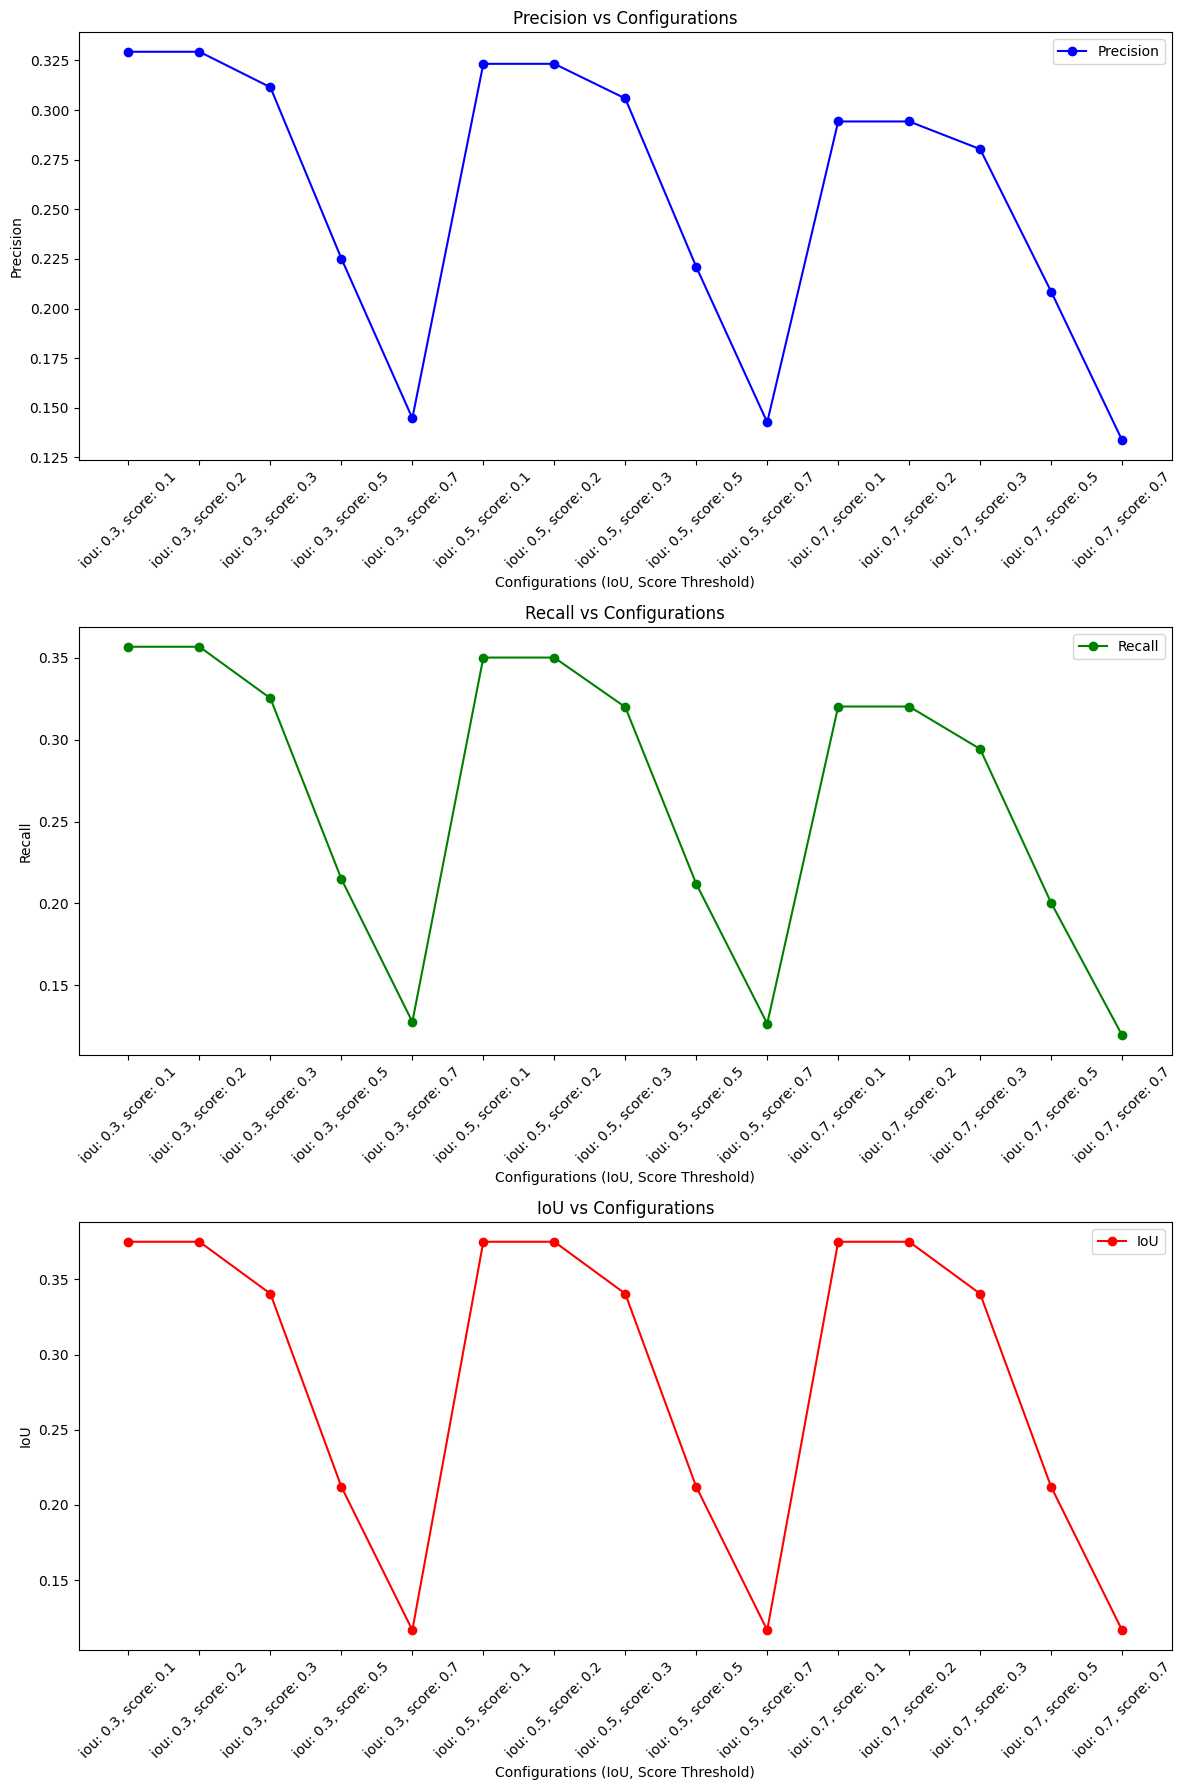

In [95]:
import matplotlib.pyplot as plt

# Extract metrics for plotting
precisions = [metric['precision'] for metric in all_metrics]
recalls = [metric['recall'] for metric in all_metrics]
ious = [metric['iou'] for metric in all_metrics]

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot Precision
axes[0].plot(all_data, precisions, label='Precision', marker='o', color='blue')
axes[0].set_title('Precision vs Configurations')
axes[0].set_xlabel('Configurations (IoU, Score Threshold)')
axes[0].set_ylabel('Precision')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

# Plot Recall
axes[1].plot(all_data, recalls, label='Recall', marker='o', color='green')
axes[1].set_title('Recall vs Configurations')
axes[1].set_xlabel('Configurations (IoU, Score Threshold)')
axes[1].set_ylabel('Recall')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

# Plot IoU
axes[2].plot(all_data, ious, label='IoU', marker='o', color='red')
axes[2].set_title('IoU vs Configurations')
axes[2].set_xlabel('Configurations (IoU, Score Threshold)')
axes[2].set_ylabel('IoU')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Возьмем следующие пороги: 
```
iou: 0.5
score: 0.2
```

Так как значения метрик на них одни из самых лучших, а также они не являются сильно заниженными.

Посчитаем качество на тестовой выборке с такими порогами

### Расчет метрик

In [98]:
best_iou = 0.5
best_score = 0.2

train_metrics = evaluate_model(yolo_model, 'train', iou_threshold=best_iou, score_threshold=best_score, batch=128)

test_metrics = evaluate_model(yolo_model, 'test', iou_threshold=best_iou, score_threshold=best_score, batch=128)

print('--------------------')
print('Train metrics', train_metrics)
print('Test metrics', test_metrics)

Current batch 0 
0: 640x640 (no detections), 3.3ms
1: 640x640 (no detections), 3.3ms
2: 640x640 (no detections), 3.3ms
3: 640x640 1 Grissini, 3.3ms
4: 640x640 1 Oil pasta, 1 Pasta with carbonara sauce, 3.3ms
5: 640x640 (no detections), 3.3ms
6: 640x640 (no detections), 3.3ms
7: 640x640 1 Pancake, 3.3ms
8: 640x640 1 Lasagna, 3.3ms
9: 640x640 1 Chocolate bar packaged, 3.3ms
10: 640x640 (no detections), 3.3ms
11: 640x640 (no detections), 3.3ms
12: 640x640 (no detections), 3.3ms
13: 640x640 5 Chocolate bar packageds, 3.3ms
14: 640x640 (no detections), 3.3ms
15: 640x640 (no detections), 3.3ms
16: 640x640 2 Tomatos, 3.3ms
17: 640x640 1 Chocolate bar packaged, 3.3ms
18: 640x640 (no detections), 3.3ms
19: 640x640 1 Popcorn, 3.3ms
20: 640x640 1 Pasta with carbonara sauce, 3.3ms
21: 640x640 2 Chips packageds, 1 Chocolate bar packaged, 3.3ms
22: 640x640 1 Pasta al ragu, 3.3ms
23: 640x640 (no detections), 3.3ms
24: 640x640 (no detections), 3.3ms
25: 640x640 1 Oil pasta, 1 Pasta with carbonara sauc

/var/folders/sv/qm0wb3ls3dsb09ltwy1y8rt40000gn/T/ipykernel_42145/3702158351.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  boxes = torch.tensor(output.boxes.xyxy, dtype=torch.float32)
/var/folders/sv/qm0wb3ls3dsb09ltwy1y8rt40000gn/T/ipykernel_42145/3702158351.py:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scores = torch.tensor(output.boxes.conf, dtype=torch.float32)
/var/folders/sv/qm0wb3ls3dsb09ltwy1y8rt40000gn/T/ipykernel_42145/3702158351.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(output.boxes

Current batch 128 
0: 640x640 1 Cracker packaged, 1 Gallette di riso packaged, 3.4ms
1: 640x640 (no detections), 3.4ms
2: 640x640 1 Salatini, 3.4ms
3: 640x640 7 Cereal bars, 12 Frutta seccas, 3.4ms
4: 640x640 1 Apple pie, 3.4ms
5: 640x640 1 Pasta al ragu, 3.4ms
6: 640x640 2 Chocolate bar packageds, 3.4ms
7: 640x640 1 Muffin, 3.4ms
8: 640x640 1 Apple, 1 Bell pepper, 3.4ms
9: 640x640 (no detections), 3.4ms
10: 640x640 (no detections), 3.4ms
11: 640x640 6 Zucchinis, 3.4ms
12: 640x640 1 Candy, 1 Salatini, 3.4ms
13: 640x640 (no detections), 3.4ms
14: 640x640 (no detections), 3.4ms
15: 640x640 (no detections), 3.4ms
16: 640x640 1 Bagel, 1 Donuts, 3.4ms
17: 640x640 1 Macaron, 1 Orange, 3.4ms
18: 640x640 1 Gallette di riso, 3.4ms
19: 640x640 1 Macaron, 3.4ms
20: 640x640 1 Pasta al ragu, 3.4ms
21: 640x640 (no detections), 3.4ms
22: 640x640 1 Tiramisu, 3.4ms
23: 640x640 (no detections), 3.4ms
24: 640x640 (no detections), 3.4ms
25: 640x640 1 Chocolate bar packaged, 1 Cracker packaged, 3.4ms
26: 6

## Вторая модель - YOLO 8

### Обучение

In [1]:
import gc
import torch
from ultralytics import settings

# clear gpu
gc.collect()
torch.mps.empty_cache()

settings.update({"wandb": True})

In [2]:
from ultralytics import YOLO

model_yolo_8 = YOLO("yolov8n.pt")

results = model_yolo_8.train(
    data="data.yaml",
    pretrained=True,

    batch=64,
    epochs=15,

    imgsz=640,

    device='mps',
    # wandb
    project="FoodScanner",
    name="yolo_8_pretrained"
)

⚠️ Download failure, retrying 1/3 https://github.com/ultralytics/assets/releases/download/v8.3.0/yolov8n.pt...


######################################################################## 100.0%


New https://pypi.org/project/ultralytics/8.3.94 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.93 🚀 Python-3.13.2 torch-2.6.0 MPS (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=15, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=FoodScanner, name=yolo_8_pretrained4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_tx

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: kaparyaka-dev (kaparyaka-dev-hse) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /Users/kaparya/Desktop/FoodScanner/train/labels.cache... 6248 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6248/6248 [00:00<?, ?it/s]

train: WARNING ⚠️ /Users/kaparya/Desktop/FoodScanner/train/images/448429b5a1464c4d_jpg.rf.2ef79828aef4e81b584647bdcda7711b.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /Users/kaparya/Desktop/FoodScanner/train/images/448429b5a1464c4d_jpg.rf.a7fe002be1e482dbe846c883e6defbd5.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /Users/kaparya/Desktop/FoodScanner/train/images/76267687e2fd05f1_jpg.rf.fb19ac4e15ca4f17980991ceb0eb7928.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /Users/kaparya/Desktop/FoodScanner/train/images/adc1a4d5e2ce4c8d_jpg.rf.80767d49fe48cd4d785776d87a62b7e1.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /Users/kaparya/Desktop/FoodScanner/train/images/ce65f77bc5abd893_jpg.rf.999106668443c7636841f974015ea663.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /Users/kaparya/Desktop/FoodScanner/train/images/d994b802290007c1_jpg.rf.4ed95dbd1c3190850a0c29ecd23aedc9.jpg: 1 duplicate labels removed



val: Scanning /Users/kaparya/Desktop/FoodScanner/valid/labels.cache... 1780 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1780/1780 [00:00<?, ?it/s]


Plotting labels to FoodScanner/yolo_8_pretrained4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000123, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to FoodScanner/yolo_8_pretrained4
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      26.2G      1.123      4.858      1.471        165        640: 100%|██████████| 98/98 [07:24<00:00,  4.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [04:19<00:00, 18.55s/it]


                   all       1780       3512     0.0124     0.0741     0.0139    0.00982

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      27.9G      1.083      4.381       1.44        178        640: 100%|██████████| 98/98 [24:36<00:00, 15.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/14 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 1/14 [00:46<10:05, 46.54s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 2/14 [01:34<09:31, 47.62s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██▏       | 3/14 [01:58<06:41, 36.54s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 4/14 [02:19<05:06, 30.63s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 5/14 [02:42<04:10, 27.81s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 6/14 [03:07<03:34, 26.82s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 7/14 [03:38<03:16, 28.02s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 8/14 [04:01<02:39, 26.61s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▍   | 9/14 [04:25<02:08, 25.77s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 10/14 [04:49<01:40, 25.05s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▊  | 11/14 [05:17<01:18, 26.13s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 12/14 [05:38<00:49, 24.64s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  93%|█████████▎| 13/14 [06:00<00:23, 23.75s/it]

WARNING ⚠️ NMS time limit 7.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [06:40<00:00, 28.58s/it]


                   all       1780       3512      0.214     0.0365     0.0186     0.0126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      27.4G      1.116      3.951      1.455        245        640: 100%|██████████| 98/98 [41:12<00:00, 25.23s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/14 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 1/14 [00:59<12:52, 59.43s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 2/14 [01:37<09:25, 47.12s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██▏       | 3/14 [01:55<06:12, 33.83s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 4/14 [02:13<04:34, 27.43s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 5/14 [02:42<04:11, 27.92s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 6/14 [03:04<03:28, 26.01s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 7/14 [03:34<03:11, 27.42s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 8/14 [03:54<02:29, 24.92s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▍   | 9/14 [04:18<02:03, 24.68s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 10/14 [04:40<01:34, 23.66s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▊  | 11/14 [05:05<01:13, 24.34s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 12/14 [05:27<00:46, 23.38s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  93%|█████████▎| 13/14 [05:47<00:22, 22.43s/it]

WARNING ⚠️ NMS time limit 7.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [06:24<00:00, 27.45s/it]


                   all       1780       3512      0.459     0.0484     0.0378     0.0247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      27.8G      1.116      3.632      1.459        194        640: 100%|██████████| 98/98 [28:18<00:00, 17.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/14 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   7%|▋         | 1/14 [00:45<09:57, 45.97s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▍        | 2/14 [01:32<09:15, 46.29s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██▏       | 3/14 [01:58<06:47, 37.05s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 4/14 [02:15<04:50, 29.09s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  36%|███▌      | 5/14 [02:39<04:04, 27.18s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  43%|████▎     | 6/14 [03:00<03:21, 25.23s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 7/14 [03:20<02:43, 23.38s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  57%|█████▋    | 8/14 [03:42<02:18, 23.10s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  64%|██████▍   | 9/14 [04:02<01:50, 22.18s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  71%|███████▏  | 10/14 [04:25<01:29, 22.39s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  79%|███████▊  | 11/14 [04:47<01:06, 22.28s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  86%|████████▌ | 12/14 [05:04<00:41, 20.53s/it]

WARNING ⚠️ NMS time limit 8.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  93%|█████████▎| 13/14 [05:21<00:19, 19.45s/it]

WARNING ⚠️ NMS time limit 7.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [05:58<00:00, 25.64s/it]


                   all       1780       3512      0.311     0.0391     0.0304     0.0206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      27.9G      1.155      3.394      1.522        233        640:   1%|          | 1/98 [00:59<1:36:26, 59.65s/it]


KeyboardInterrupt: 

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x1499faa50>> (for post_run_cell), with arguments args (<ExecutionResult object at 10873f100, execution_count=2 error_before_exec=None error_in_exec= info=<ExecutionInfo object at 11971afd0, raw_cell="from ultralytics import YOLO

model_yolo_8 = YOLO(.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/Users/kaparya/Desktop/FoodScanner/train_model.ipynb#X25sZmlsZQ%3D%3D> result=None>,),kwargs {}:


BrokenPipeError: [Errno 32] Broken pipe

In [10]:
from ultralytics import YOLO
import torch


test_folder = 'test/images/'

model_yolo_8 = YOLO("FoodScanner/yolo_8_pretrained4/weights/best.pt")


with torch.no_grad():
    results = model_yolo_8.predict([test_folder + "208382_jpg.rf.82ceac398c42899b91906288637b26f5.jpg"])  # return a list of Results objects

# Process results list
for idx, result in enumerate(results):
    print('Confidence', result.boxes.conf)
    print('Class', result.boxes.cls)
    print('XY', result.boxes)
    
    result.show()  # display to screen
    result.save(filename=f"rtdetr_result_{idx}.jpg")  # save to disk


0: 640x640 (no detections), 54.3ms
Speed: 2.4ms preprocess, 54.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
Confidence tensor([])
Class tensor([])
XY ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))


### Подбор IoU и Score threshold

In [15]:
model_yolo_8.to(device='mps')

iou_thresholds = [0.3, 0.5, 0.7]
score_thresholds = [0.1, 0.2, 0.3, 0.5, 0.7]

all_data = []
all_metrics = []

for iou_threshold in iou_thresholds:
    for score_threshold in score_thresholds:
        print(f"--------\niou: {iou_threshold}, score: {score_threshold}")
        metrics = evaluate_model(model_yolo_8, 'valid', iou_threshold=iou_threshold, score_threshold=score_threshold, batch=128)
        all_data.append(f"iou: {iou_threshold}, score: {score_threshold}")
        all_metrics.append(metrics)

--------
iou: 0.3, score: 0.1
Current batch 0 
0: 640x640 (no detections), 11.1ms
1: 640x640 (no detections), 11.1ms
2: 640x640 (no detections), 11.1ms
3: 640x640 1 Pasta with carbonara sauce, 11.1ms
4: 640x640 1 Apple, 1 Strawberry, 1 Tomato, 11.1ms
5: 640x640 1 Tomato, 11.1ms
6: 640x640 (no detections), 11.1ms
7: 640x640 (no detections), 11.1ms
8: 640x640 (no detections), 11.1ms
9: 640x640 (no detections), 11.1ms
10: 640x640 (no detections), 11.1ms
11: 640x640 (no detections), 11.1ms
12: 640x640 (no detections), 11.1ms
13: 640x640 (no detections), 11.1ms
14: 640x640 (no detections), 11.1ms
15: 640x640 (no detections), 11.1ms
16: 640x640 1 Chips packaged, 11.1ms
17: 640x640 (no detections), 11.1ms
18: 640x640 (no detections), 11.1ms
19: 640x640 (no detections), 11.1ms
20: 640x640 (no detections), 11.1ms
21: 640x640 1 Gallette di riso packaged, 1 Salatini packaged, 11.1ms
22: 640x640 (no detections), 11.1ms
23: 640x640 (no detections), 11.1ms
24: 640x640 (no detections), 11.1ms
25: 640

/var/folders/sv/qm0wb3ls3dsb09ltwy1y8rt40000gn/T/ipykernel_78169/3702158351.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  boxes = torch.tensor(output.boxes.xyxy, dtype=torch.float32)
/var/folders/sv/qm0wb3ls3dsb09ltwy1y8rt40000gn/T/ipykernel_78169/3702158351.py:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scores = torch.tensor(output.boxes.conf, dtype=torch.float32)
/var/folders/sv/qm0wb3ls3dsb09ltwy1y8rt40000gn/T/ipykernel_78169/3702158351.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(output.boxes

Current batch 128 
0: 640x640 (no detections), 3.6ms
1: 640x640 (no detections), 3.6ms
2: 640x640 1 Pasta with carbonara sauce, 3.6ms
3: 640x640 (no detections), 3.6ms
4: 640x640 1 Risotto, 3.6ms
5: 640x640 (no detections), 3.6ms
6: 640x640 (no detections), 3.6ms
7: 640x640 (no detections), 3.6ms
8: 640x640 (no detections), 3.6ms
9: 640x640 1 Strawberry, 5 Tomatos, 3.6ms
10: 640x640 8 Oranges, 1 Tomato, 3.6ms
11: 640x640 (no detections), 3.6ms
12: 640x640 (no detections), 3.6ms
13: 640x640 (no detections), 3.6ms
14: 640x640 (no detections), 3.6ms
15: 640x640 1 Gallette di riso packaged, 1 Merendine packaged, 3.6ms
16: 640x640 1 Tomato, 3.6ms
17: 640x640 (no detections), 3.6ms
18: 640x640 9 Tomatos, 3.6ms
19: 640x640 (no detections), 3.6ms
20: 640x640 (no detections), 3.6ms
21: 640x640 4 Tomatos, 3.6ms
22: 640x640 (no detections), 3.6ms
23: 640x640 (no detections), 3.6ms
24: 640x640 (no detections), 3.6ms
25: 640x640 (no detections), 3.6ms
26: 640x640 (no detections), 3.6ms
27: 640x640 

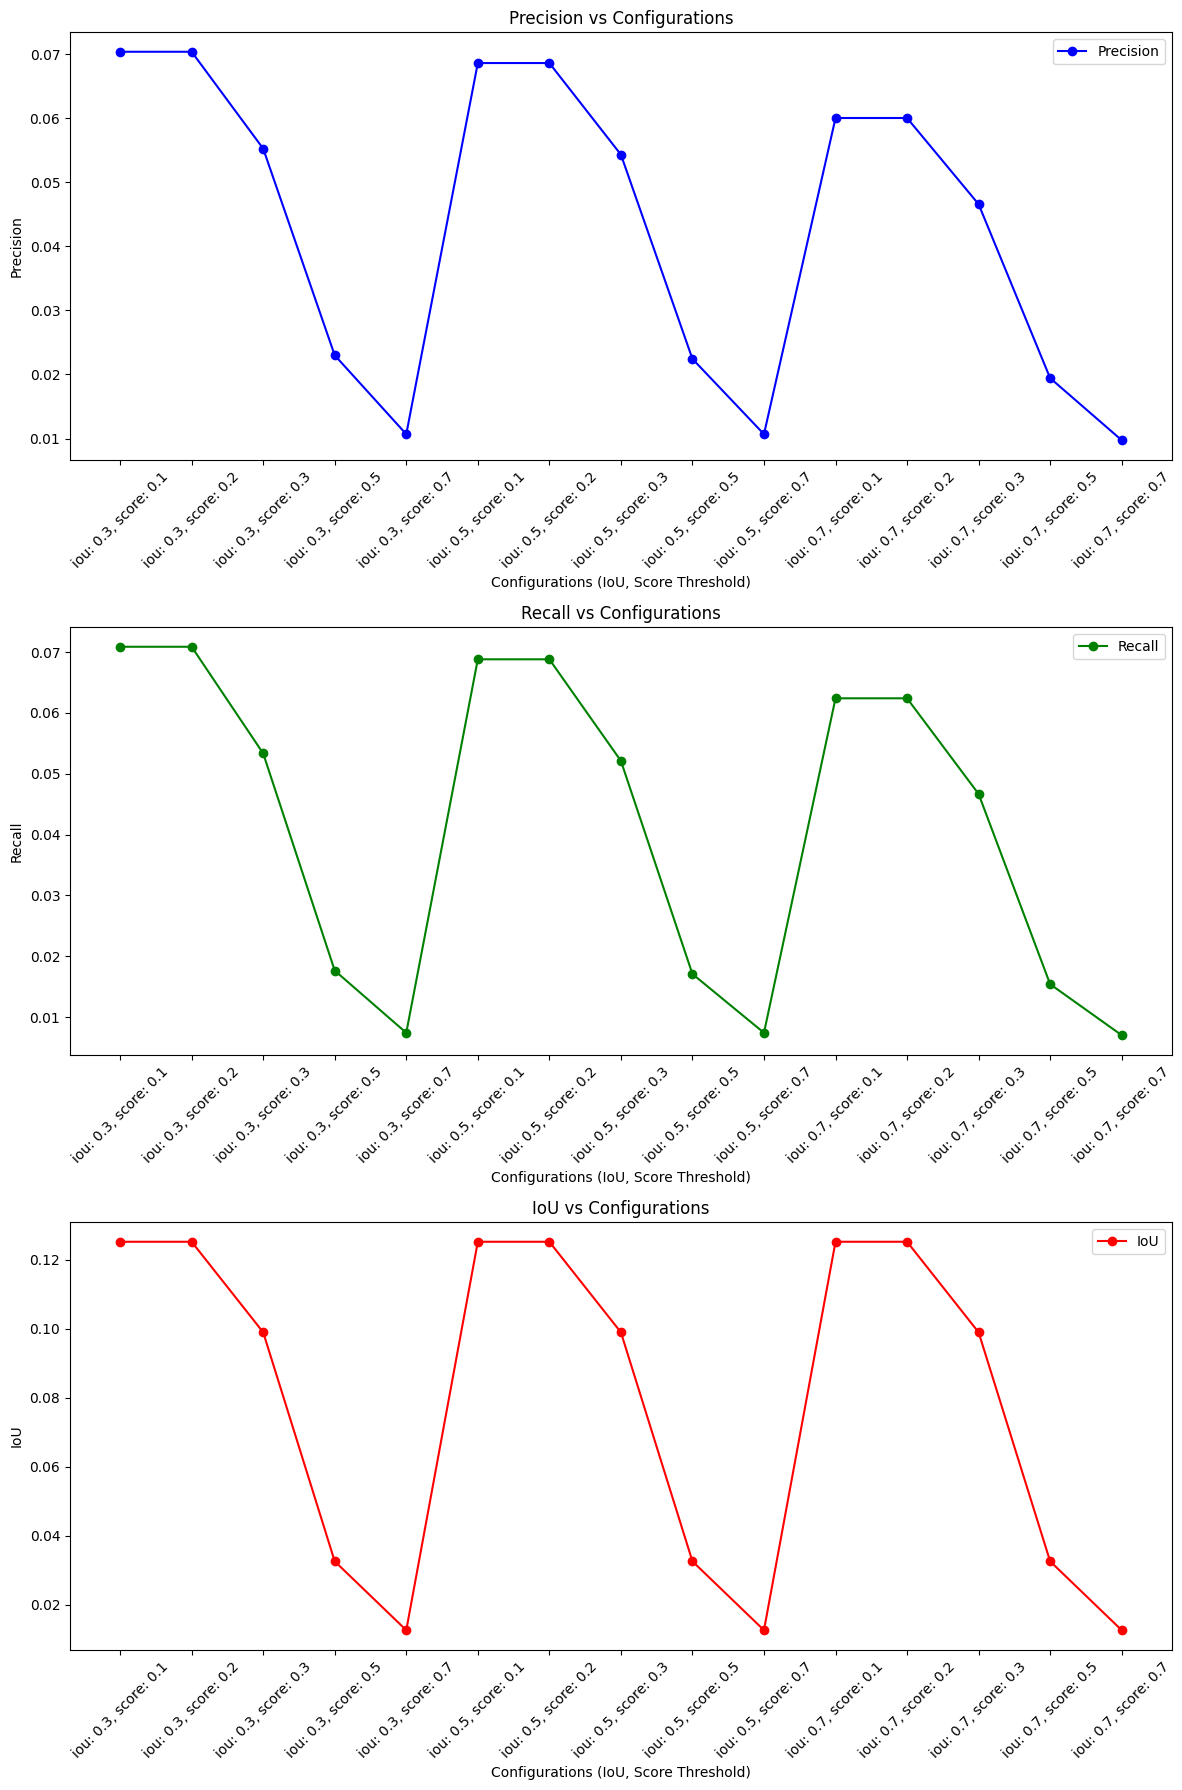

In [16]:
import matplotlib.pyplot as plt

# Extract metrics for plotting
precisions = [metric['precision'] for metric in all_metrics]
recalls = [metric['recall'] for metric in all_metrics]
ious = [metric['iou'] for metric in all_metrics]

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot Precision
axes[0].plot(all_data, precisions, label='Precision', marker='o', color='blue')
axes[0].set_title('Precision vs Configurations')
axes[0].set_xlabel('Configurations (IoU, Score Threshold)')
axes[0].set_ylabel('Precision')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

# Plot Recall
axes[1].plot(all_data, recalls, label='Recall', marker='o', color='green')
axes[1].set_title('Recall vs Configurations')
axes[1].set_xlabel('Configurations (IoU, Score Threshold)')
axes[1].set_ylabel('Recall')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

# Plot IoU
axes[2].plot(all_data, ious, label='IoU', marker='o', color='red')
axes[2].set_title('IoU vs Configurations')
axes[2].set_xlabel('Configurations (IoU, Score Threshold)')
axes[2].set_ylabel('IoU')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [18]:
best_iou = 0.5
best_score = 0.3

train_metrics = evaluate_model(model_yolo_8, 'train', iou_threshold=best_iou, score_threshold=best_score, batch=128)

test_metrics = evaluate_model(model_yolo_8, 'test', iou_threshold=best_iou, score_threshold=best_score, batch=128)

print('--------------------')
print('Train metrics', train_metrics)
print('Test metrics', test_metrics)

Current batch 0 
0: 640x640 (no detections), 3.8ms
1: 640x640 (no detections), 3.8ms
2: 640x640 (no detections), 3.8ms
3: 640x640 (no detections), 3.8ms
4: 640x640 1 Pasta with carbonara sauce, 1 Tomato, 3.8ms
5: 640x640 (no detections), 3.8ms
6: 640x640 (no detections), 3.8ms
7: 640x640 (no detections), 3.8ms
8: 640x640 (no detections), 3.8ms
9: 640x640 1 Gallette di riso packaged, 3.8ms
10: 640x640 (no detections), 3.8ms
11: 640x640 (no detections), 3.8ms
12: 640x640 (no detections), 3.8ms
13: 640x640 (no detections), 3.8ms
14: 640x640 (no detections), 3.8ms
15: 640x640 (no detections), 3.8ms
16: 640x640 2 Strawberrys, 15 Tomatos, 3.8ms
17: 640x640 2 Chips packageds, 3.8ms
18: 640x640 (no detections), 3.8ms
19: 640x640 (no detections), 3.8ms
20: 640x640 (no detections), 3.8ms
21: 640x640 (no detections), 3.8ms
22: 640x640 (no detections), 3.8ms
23: 640x640 (no detections), 3.8ms
24: 640x640 (no detections), 3.8ms
25: 640x640 (no detections), 3.8ms
26: 640x640 (no detections), 3.8ms
2

/var/folders/sv/qm0wb3ls3dsb09ltwy1y8rt40000gn/T/ipykernel_78169/3702158351.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  boxes = torch.tensor(output.boxes.xyxy, dtype=torch.float32)
/var/folders/sv/qm0wb3ls3dsb09ltwy1y8rt40000gn/T/ipykernel_78169/3702158351.py:76: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scores = torch.tensor(output.boxes.conf, dtype=torch.float32)
/var/folders/sv/qm0wb3ls3dsb09ltwy1y8rt40000gn/T/ipykernel_78169/3702158351.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(output.boxes

Current batch 128 
0: 640x640 1 Gallette di riso packaged, 3.3ms
1: 640x640 1 Cracker packaged, 1 Gallette di riso packaged, 1 Salatini packaged, 3.3ms
2: 640x640 (no detections), 3.3ms
3: 640x640 (no detections), 3.3ms
4: 640x640 (no detections), 3.3ms
5: 640x640 (no detections), 3.3ms
6: 640x640 (no detections), 3.3ms
7: 640x640 (no detections), 3.3ms
8: 640x640 (no detections), 3.3ms
9: 640x640 (no detections), 3.3ms
10: 640x640 (no detections), 3.3ms
11: 640x640 2 Tomatos, 3.3ms
12: 640x640 4 Tomatos, 3.3ms
13: 640x640 (no detections), 3.3ms
14: 640x640 (no detections), 3.3ms
15: 640x640 (no detections), 3.3ms
16: 640x640 1 Donuts, 1 Macaron, 3.3ms
17: 640x640 1 Tomato, 3.3ms
18: 640x640 (no detections), 3.3ms
19: 640x640 (no detections), 3.3ms
20: 640x640 (no detections), 3.3ms
21: 640x640 (no detections), 3.3ms
22: 640x640 1 Chicken roast, 3.3ms
23: 640x640 (no detections), 3.3ms
24: 640x640 (no detections), 3.3ms
25: 640x640 (no detections), 3.3ms
26: 640x640 (no detections), 3.